# Práctica 4: Regresión logística regularizada.

Greta y Héloïse

Grupo 2

## Leer el contenido del archivo

In [2]:
import numpy as np
from pandas.io.parsers import read_csv
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt

In [85]:
#from google.colab import drive
#drive.mount('/content/drive')
#datos = read_csv('/content/drive/MyDrive/DOCENCIA/22-23/AA/p4/data4.csv', header=None).to_numpy()

In [3]:
datos = read_csv("data4.csv", header=None).to_numpy()
print(datos.shape)
print(datos[:10])

(118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]
 [-0.39804   0.034357  1.      ]
 [-0.30588  -0.19225   1.      ]
 [ 0.016705 -0.40424   1.      ]
 [ 0.13191  -0.51389   1.      ]]


# Visualización de los datos

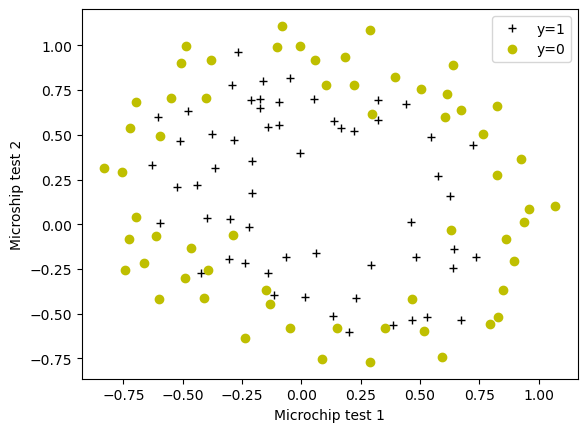

In [4]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    """
    Plot the dataset   
    """
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    plt.xlabel("Microchip test 1")
    plt.ylabel("Microship test 2")
    plt.legend();

X = datos[:, :-1]
Y = datos[:, -1]
plot_data(X,Y,pos_label="y=1", neg_label="y=0")

## Función sigmoide

In [5]:
def sigmoide(z):
    """
    return the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

## Mapeo de los atributos

In [6]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

XX = map_feature(X[:, 0], X[:, 1])
print(XX.shape)
npoly = XX.shape[1]

(118, 27)


## Cálculo de la función de regularizada coste y su gradiente

In [7]:
def cost(x,y,w,b,lamb):
    """
    Compute the cost function and the gradients (of the weight vector and bias term) 
    of a logistic regression model with regularization.
    The inputs are the feature matrix X, target vector y, weight vector w,
    bias term b, and regularization parameter lambda.
    """
    m = len(y)
    f_wb = sigmoide(np.dot(x,w)+b)
    term1 = np.dot(-y, np.log(f_wb))
    term2 = np.dot((1 - y), np.log(1 - f_wb))
    term_regu = (lamb / (2 * m)) * np.sum(np.square(w))
    J = (np.sum(term1 - term2)  / m) + term_regu

    gradW = (1/m) * np.dot((f_wb - y),x) + (lamb/m)*w
    gradB = (1/m) * np.sum((f_wb - y))
    return J, gradW, gradB

## Método de descenso de gradiente

In [8]:
def gradient_descent(XX,Y, alpha, max_iter, lamb):
    
    npoly = XX.shape[1]
    w, tmp_w = np.zeros(npoly), np.zeros(npoly)
    b = 0
    J_history = []
    
    for iter in range(max_iter):
        J, dJ_w, dJ_b = cost(XX,Y,w,b,lamb)
        tmp_w = w - (alpha * dJ_w)
        tmp_b = b - (alpha * dJ_b)
        w, b = tmp_w, tmp_b
        J_history.append(cost(XX, Y, w, b, lamb)[0]) 
    return w, b, J_history


# Cálculo del valor óptimo de los parámetros y efectos de la regularización

In [9]:
# Verify points
X, Y = datos[:, :-1],datos[:, -1]
XX = map_feature(X[:, 0], X[:, 1])
m,n = np.shape(XX)
w = np.zeros(n)
print('The cost with w = [0,0,...,0] and b = 0 and lambda = 0, is:', cost(XX, Y, w, 0,0)[0])

The cost with w = [0,0,...,0] and b = 0 and lambda = 0, is: 0.6931471805599453


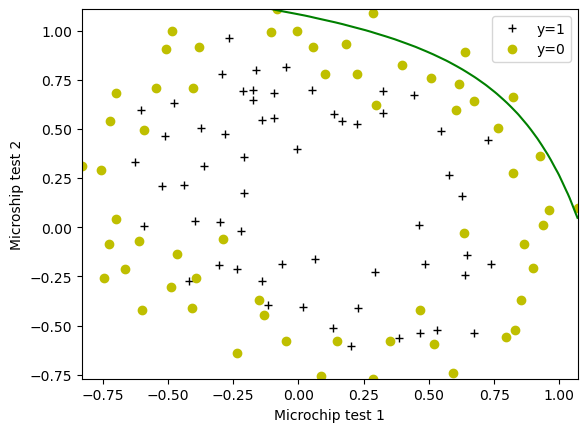

In [107]:
def plot_complex_decision_boundary(W, b, X, y):     
    plot_data(X,Y,pos_label="y=1", neg_label="y=0") 
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    u = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
    v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)
    
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoide(np.dot(map_feature(u[i], v[j]), W) + b)

    # important to transpose z before calling contour       
    z = z.T
    
    # Plot z = 0
    plt.contour(u,v,z, levels = [0.5], colors="g")

X = datos[:, :-1]
XX = map_feature(X[:, 0], X[:, 1])
W = np.ones(npoly)
b = -8.0
plot_complex_decision_boundary(W, b, XX, Y)


In [12]:
def accuracy(X, y, w, b, cutoff):
    pred = [sigmoide(np.dot(X, w) + b) >= cutoff]
    acc = np.mean(pred == y)
    return (acc * 100)

X, Y = datos[:, :-1],datos[:, -1]
XX = map_feature(X[:, 0], X[:, 1])

# Gradient Descent Method
learning_rate, max_iter = 0.001, 100000
w_min, b_min, J = gradient_descent(XX,Y, learning_rate, max_iter, 0)

# Accuracy of the logistic regularized regression
porcentage = accuracy(XX, Y, w_min, b_min, 0.5)

In [13]:
porcentage

83.05084745762711

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  0  is of  83.05 % 


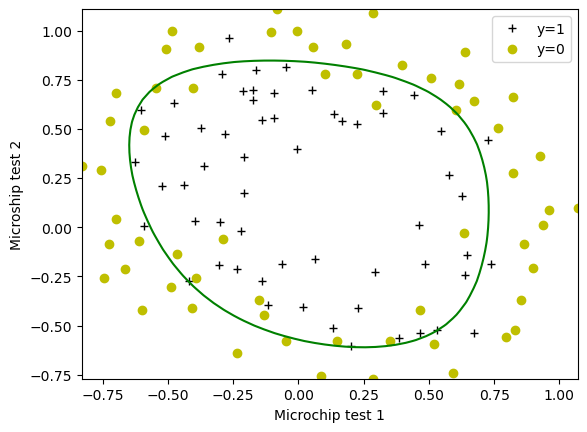

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  1  is of  83.05 % 


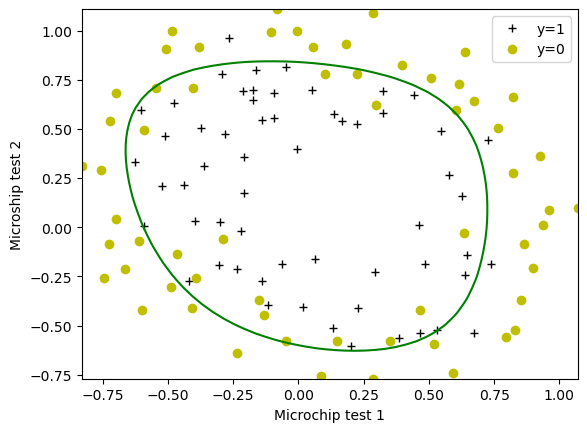

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  10  is of  74.58 % 


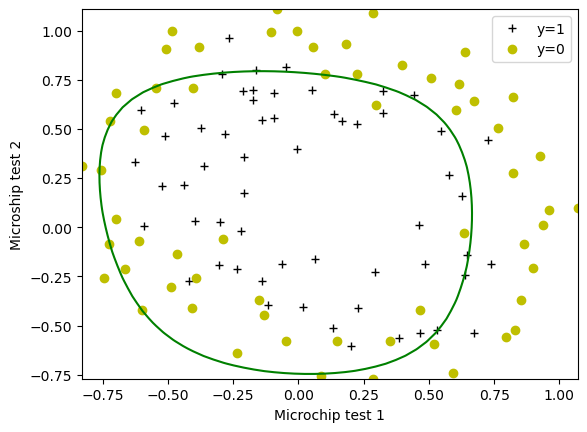

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  50  is of  66.95 % 


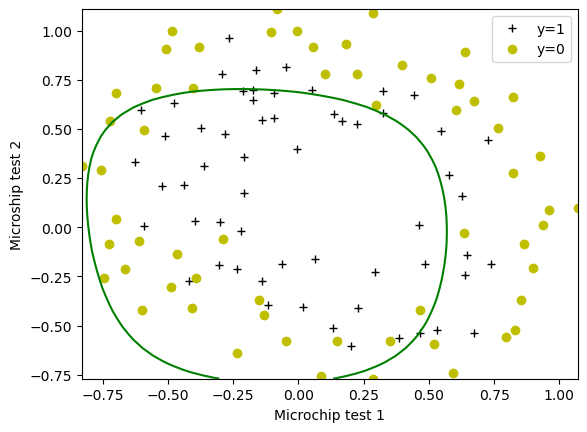

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  80  is of  64.41 % 


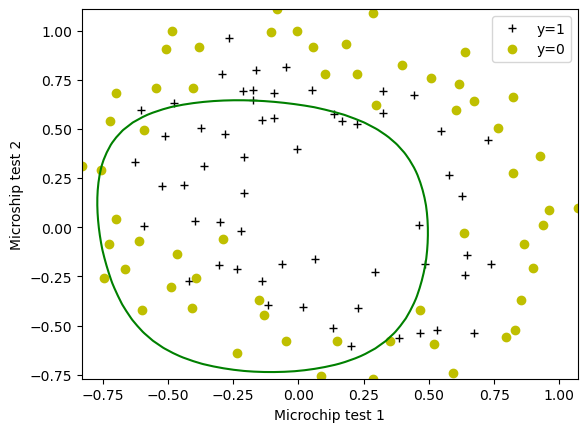

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  100  is of  61.02 % 


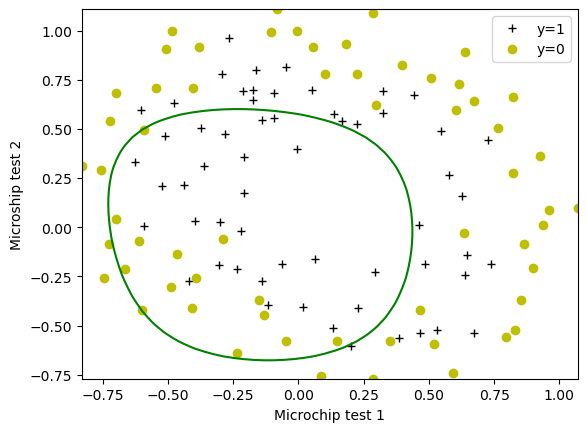

In [182]:
# Evaluate the optimal for different λ

cases = {"0": 0, "1": 1, "10": 10, "50": 50, "80": 80, "100": 100}

# Accuracy
def accuracy(X, y, w, b, cutoff):
    pred = [sigmoide(np.dot(X, w) + b) >= cutoff]
    acc = np.mean(pred == y)
    return (acc * 100)

X, Y = datos[:, :-1],datos[:, -1]
XX = map_feature(X[:, 0], X[:, 1])
porc =[]

for k, lamb in cases.items():
    
    # Gradient Descent Method
    learning_rate, max_iter = 0.001, 100000
    w_min, b_min, J = gradient_descent(XX,Y, learning_rate, max_iter, lamb)
    
    # Accuracy of the logistic regularized regression
    porcentage = accuracy(XX, Y, w_min, b_min, 0.5)
    porc.append(porcentage)
    print(100 * "-")
    print('\n The accuracy of the classifier for λ = ', lamb, ' is of ', "%.2f" % porcentage, '% ')
    
    plot_complex_decision_boundary(w_min, b_min, XX, Y)
    plt.show()


# Observations

When λ is too little there is overfitting, while if λ is too big (10,50,80,100) there is underfitting. For λ=1 the fitting is good.

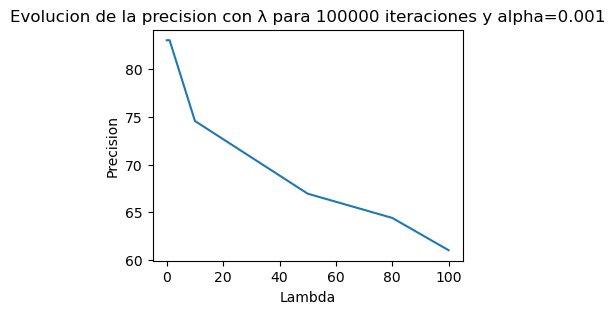

In [183]:
plt.figure(figsize=(4,3))
plt.plot([0,1,10,50,80,100],porc)
plt.xlabel('Lambda')
plt.ylabel('Precision')
plt.title('Evolucion de la precision con λ para 100000 iteraciones y alpha=0.001')
plt.show()